In [11]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [12]:
# Loading the data and setting the index
df = pd.read_csv('../data/weekly_customer_complaints.csv', index_col='week', parse_dates=True)
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [14]:
# Remove ',' and transform into float
df['complaints']=df['complaints'].str.replace(',','').astype(float)
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,37.26%,1,0,0
2018-01-08,1701.0,35.38%,0,0,0
2018-01-15,1711.0,36.22%,1,0,0
2018-01-22,1443.0,38.33%,1,0,0
2018-01-29,1397.0,36.34%,0,0,0


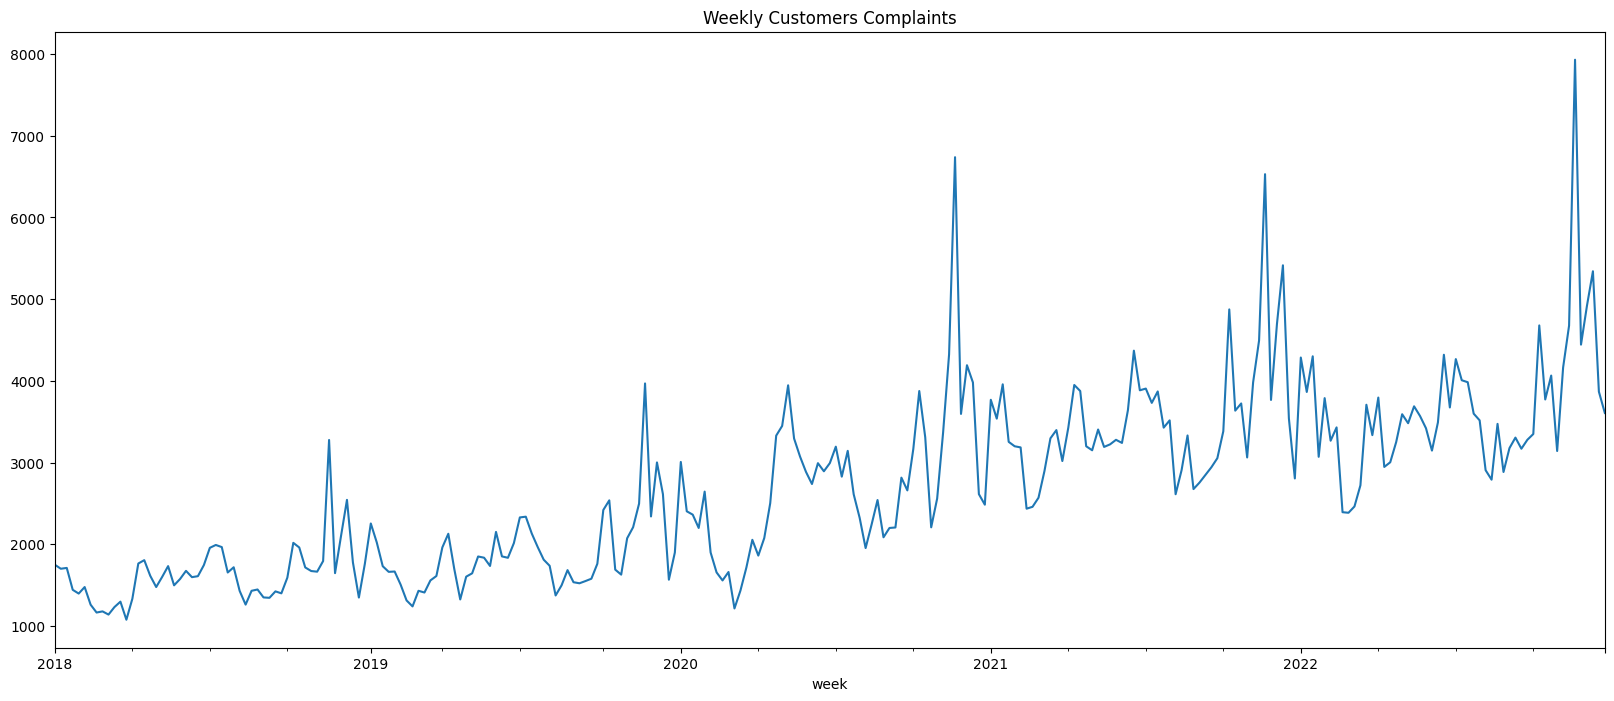

In [15]:
# Complaints Plot
plt.figure(figsize=(20,8))
df['complaints'].plot(title='Weekly Customers Complaints')
plt.show()

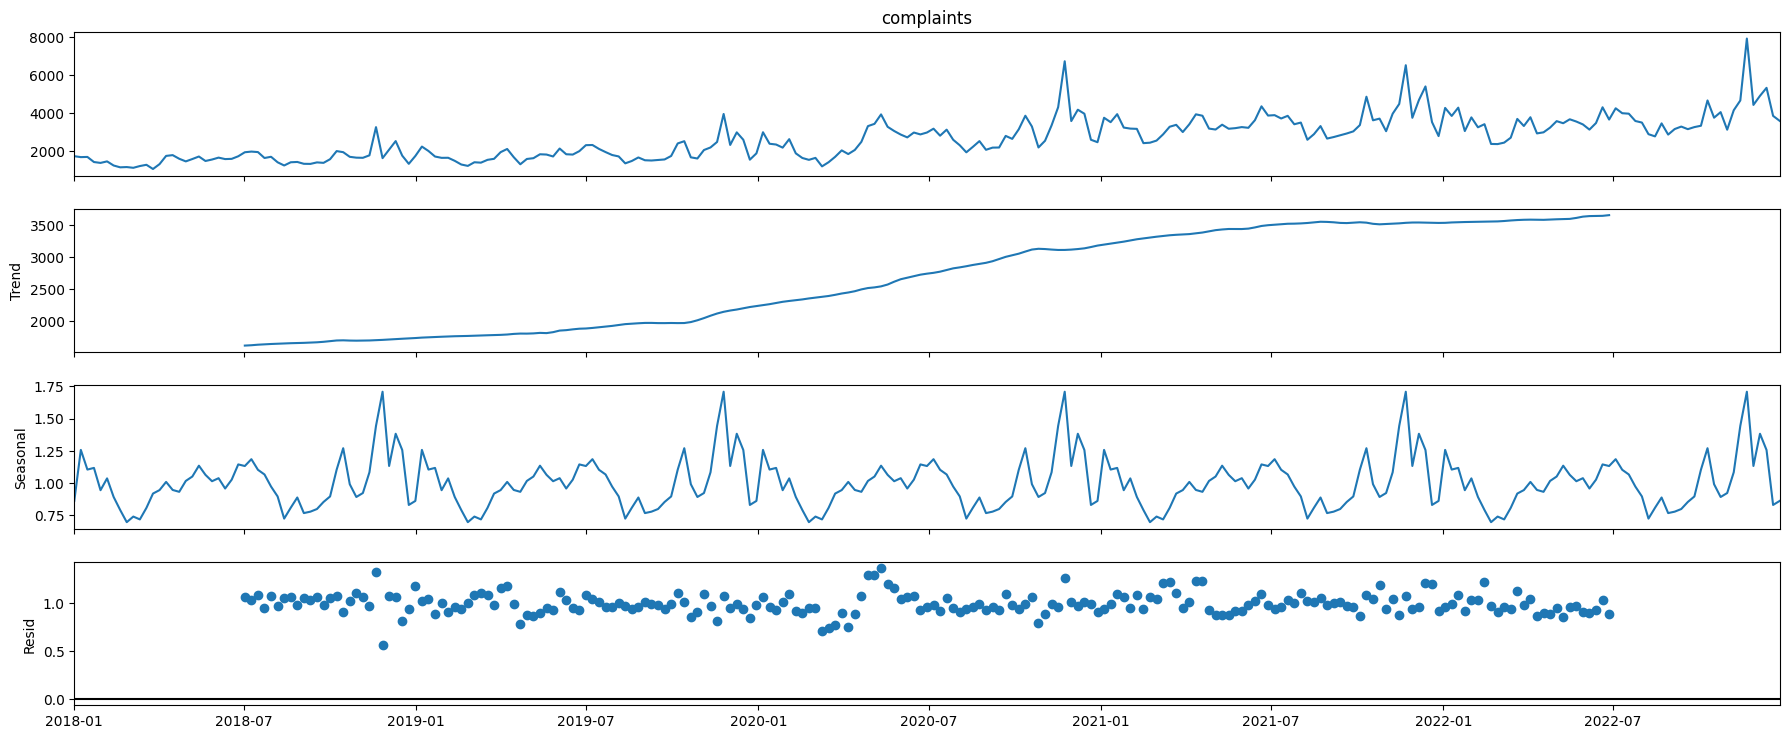

In [16]:
# Seasonal Decomposition Plots for Bitcoin Data
decomposition = seasonal_decompose(df['complaints'], 
                                   model='multiplicative', 
                                   period=52)

fig = decomposition.plot()
fig.set_size_inches(20,8)
plt.show()

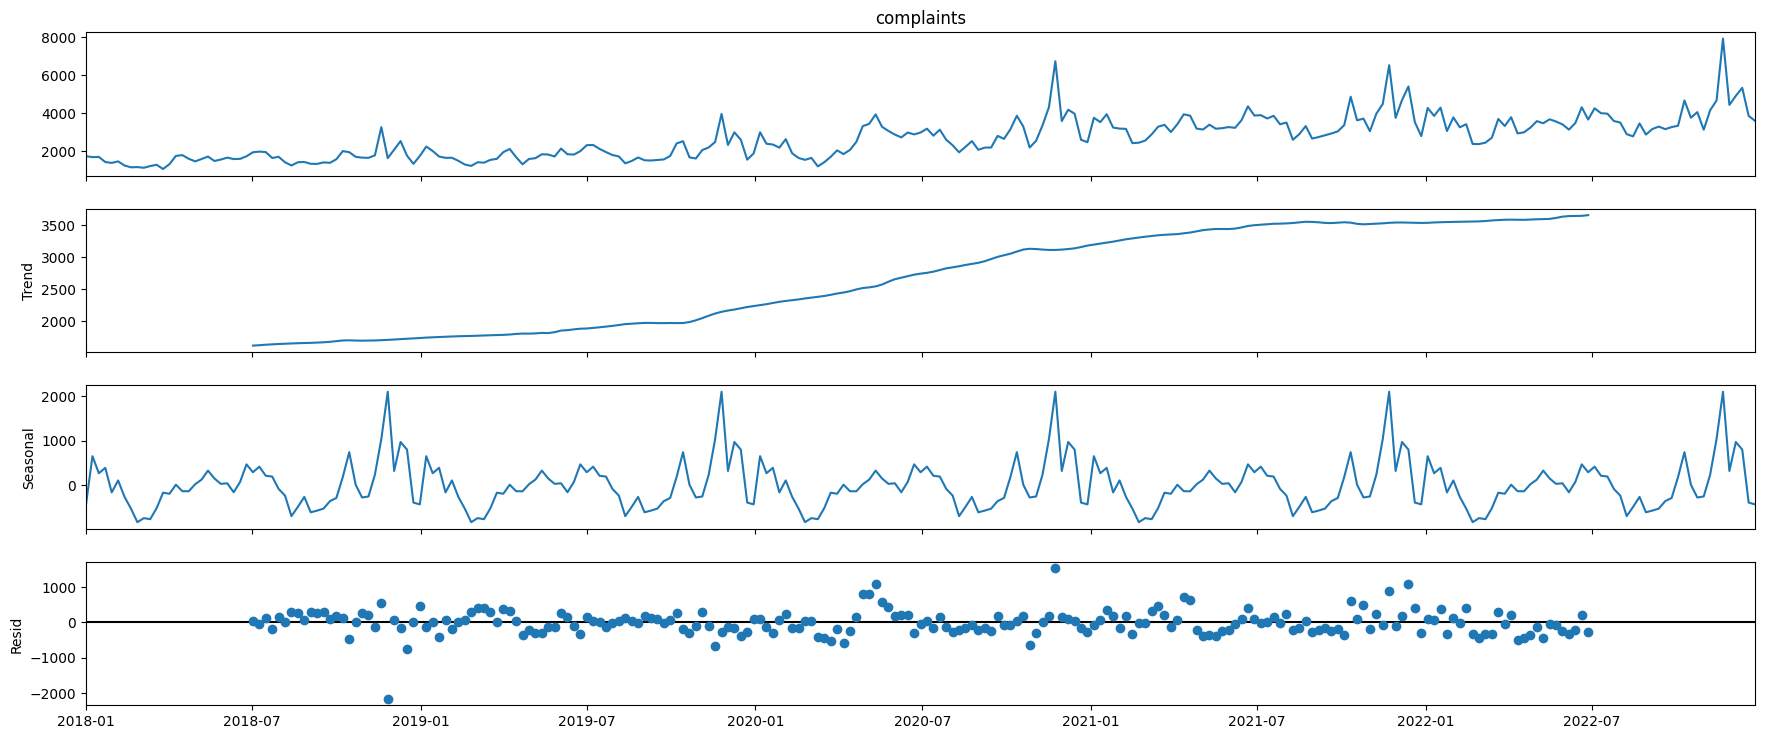

In [17]:
# Seasonal Decomposition Plots for Bitcoin Data
decomposition = seasonal_decompose(df['complaints'], 
                                   model='additive', 
                                   period=52)

fig = decomposition.plot()
fig.set_size_inches(20,8)
plt.show()

In [18]:
# Training and Testing Split
periods = 13
train, test = df.iloc[:-periods,0], df.iloc[-periods:,0]

d:\BTD\Data Visualization\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
d:\BTD\Data Visualization\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
d:\BTD\Data Visualization\.venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\BTD\Data Visualization\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


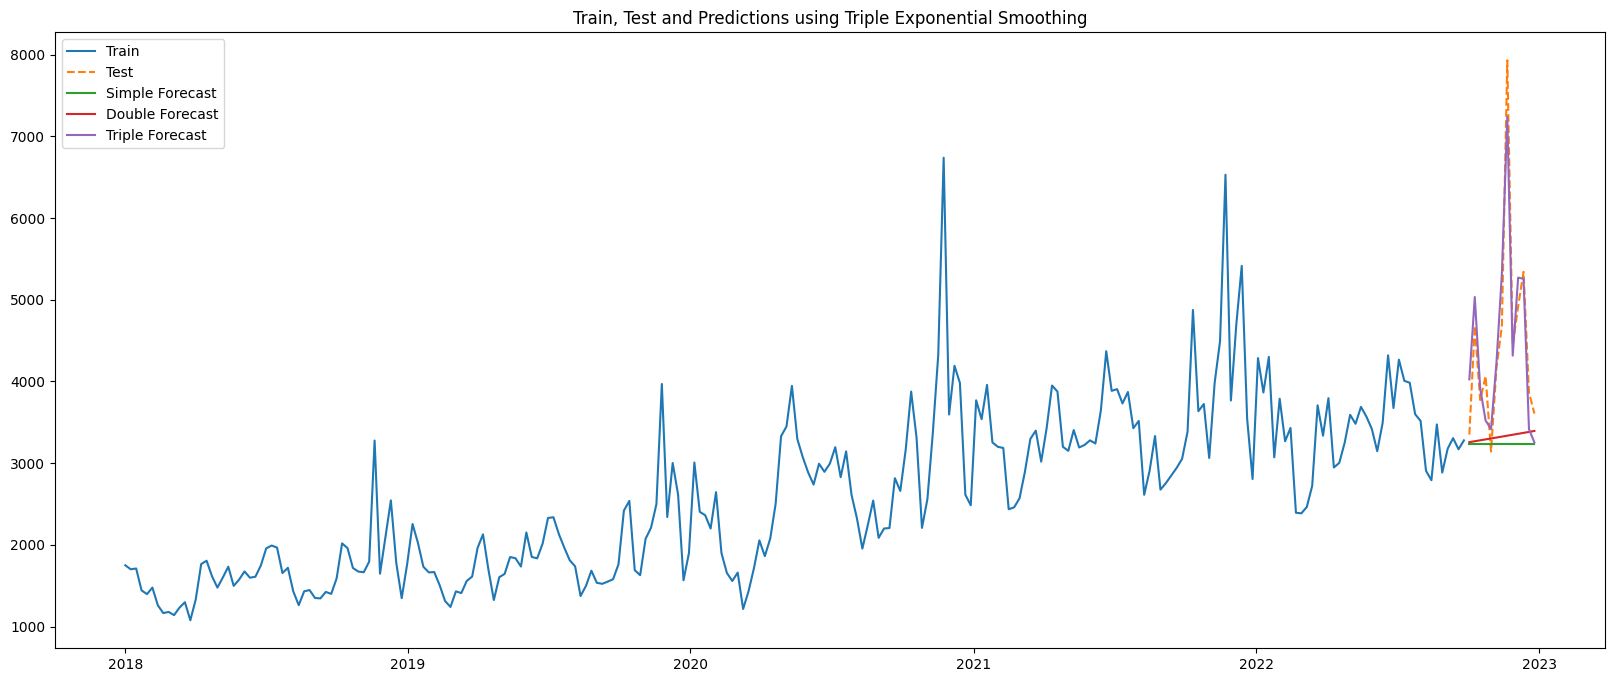

In [19]:
# plot training test and forecast
plt.figure(figsize=(20,8))

# Simple Exponential Smoothing Model and Prediction
model_simple = SimpleExpSmoothing(train).fit()
simple_predictions = model_simple.forecast(len(test))

# Double Exponential Smoothing Model and Prediction 
model_double = ExponentialSmoothing(train,
                                    trend='mul',
                                    seasonal=None).fit()
predictions_double = model_double.forecast(len(test))

# Triple Exponential Smoothing Model and Prediction 
model_triple = ExponentialSmoothing(train,
                                    trend='add',
                                    seasonal='mul',
                                    seasonal_periods=52).fit()
predictions_triple = model_triple.forecast(len(test))

plt.plot(train, label='Train')
plt.plot(test, label='Test', linestyle = '--')
plt.plot(simple_predictions, label='Simple Forecast')
plt.plot(predictions_double, label='Double Forecast')
plt.plot(predictions_triple, label='Triple Forecast')
plt.legend()
plt.title("Train, Test and Predictions using Triple Exponential Smoothing")

plt.show()